In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import cv2

from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Convolution2D, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

from skimage.feature import hog
from skimage import data, exposure
import pickle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Donwloading Data

In [2]:
# !wget https://www.floydhub.com/api/v1/resources/tJ4C72SQps88GWr3hr88uU/X.pickle?content=true&rename=xpickle
!wget https://www.floydhub.com/api/v1/resources/peBDawxGmFZbnerqcSwfef/X.pickle?content=true&rename=xpickle
!mv X.pickle\?content\=true X.pickle

--2019-03-10 09:22:47--  https://www.floydhub.com/api/v1/resources/peBDawxGmFZbnerqcSwfef/X.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.129.32, 104.25.128.32, 2606:4700:20::6819:8020, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.129.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘X.pickle?content=true’

X.pickle?content=tr     [  <=>               ] 454.79M  13.5MB/s    in 35s     

2019-03-10 09:23:23 (12.8 MB/s) - ‘X.pickle?content=true’ saved [476886784]



In [3]:
# !wget https://www.floydhub.com/api/v1/resources/xRu8AHanSHPfwpN2AAsdjb/y.pickle?content=true&rename=ypickle
!wget https://www.floydhub.com/api/v1/resources/peBDawxGmFZbnerqcSwfef/y.pickle?content=true&rename=ypickle
!mv y.pickle\?content\=true y.pickle

--2019-03-10 09:23:31--  https://www.floydhub.com/api/v1/resources/peBDawxGmFZbnerqcSwfef/y.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.129.32, 104.25.128.32, 2606:4700:20::6819:8020, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.129.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘y.pickle?content=true’

y.pickle?content=tr     [     <=>            ]   9.85M  10.2MB/s    in 1.0s    

2019-03-10 09:23:32 (10.2 MB/s) - ‘y.pickle?content=true’ saved [10328396]



In [0]:
# !wget https://www.floydhub.com/api/v1/resources/oYw4Zq77is4J3wkyLGEKXc/X.pickle?content=true&rename=xpickle 
# !mv X.pickle\?content\=true X_v.pickle

--2019-03-08 15:13:23--  https://www.floydhub.com/api/v1/resources/oYw4Zq77is4J3wkyLGEKXc/X.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.129.32, 104.25.128.32, 2606:4700:20::6819:8020, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.129.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘X.pickle?content=true’

X.pickle?content=tr     [     <=>            ]   1.24G  45.5MB/s    in 30s     

2019-03-08 15:13:53 (42.9 MB/s) - ‘X.pickle?content=true’ saved [1327360770]



In [0]:
# !wget https://www.floydhub.com/api/v1/resources/oYw4Zq77is4J3wkyLGEKXc/y.pickle?content=true&rename=ypickle
# !mv y.pickle\?content\=true y_v.pickle

--2019-03-08 15:14:47--  https://www.floydhub.com/api/v1/resources/oYw4Zq77is4J3wkyLGEKXc/y.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.129.32, 104.25.128.32, 2606:4700:20::6819:8020, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.129.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘y.pickle?content=true’

y.pickle?content=tr     [ <=>                ] 163.45K  --.-KB/s    in 0.04s   

2019-03-08 15:14:48 (3.94 MB/s) - ‘y.pickle?content=true’ saved [167369]



# Loading Data

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [5]:
print(X.shape)
print(y.shape)

(198620, 2401)
(198620,)


In [0]:
# Conversion of non numeric symbols to numbers

y[y == '+'] = 10
y[y=='-'] = 11
y[y=='times'] = 12
y[y=='forward_slash'] = 13
y[y=='X']=14
y[y=='y']=15
y[y=='z']=16

In [0]:
y = np_utils.to_categorical(y)
# 1 : 0 1 0 0  0 0 .. 14 zeroos

In [0]:
print(X.shape)
print(y.shape)

(198620, 2401)
(198620, 17)


# Checking Sample Image

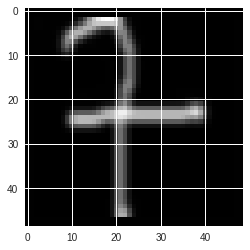

In [0]:
plt.imshow(X[32201].reshape(49,49),cmap='gray')

In [0]:
fd,img = hog(X[32201].reshape(49,49),pixels_per_cell=(5,5),
             visualise=True)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [0]:
fd.shape

(3969,)

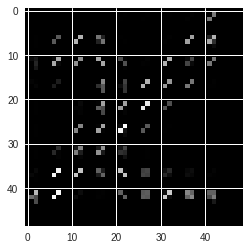

In [0]:
plt.imshow(img,cmap='gray')

In [0]:
fd.shape

(3969,)

In [0]:
def extract_hog(array) : 
    img = array.reshape(49,49)
    fd = hog(img,pixels_per_cell=(5,5))
    return fd

In [0]:
X = np.apply_along_axis(extract_hog,axis=1,arr = X)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [0]:
print(X.shape)

(156816, 3969)


# Saving processed data to prevent loss

In [0]:
import h5py
hf = h5py.File('X_2.h5', 'w')
hf.create_dataset('dataset_1', data=X)
hf.close()

# Save to Floydhub

In [0]:
# !pip install floyd-cli
!floyd login -k 945c4c6790dc5e797f64dcba14dd41a6
!mkdir data
!mv X_2* data
!cd data && floyd data init mayankt/crohme-hog-features-5x5
!cd data && floyd data upload

Login Successful as mayankt
mkdir: cannot create directory ‘data’: File exists
mv: cannot stat 'X_2*': No such file or directory
Data source "mayankt/crohme-hog-features-5x5" initialized in current directory

    You can now upload your data to Floyd by:
        floyd data upload
    
Get number of files to compress... (this could take a few seconds)
Compressing 2 files
Compressing data...
[================================] 2/2 - 00:12:22
Making create request to server...
Initializing upload...
Uploading compressed data. Total upload size: 1.2GiB
[================================] 1341009113/1341009113 - 00:03:48
Removing compressed data...
Upload finished.
Waiting for server to unpack data.
You can exit at any time and come back to check the status with:
	floyd data upload -r
Waiting for unpack..........................

NAME
------------------------------------------
mayankt/datasets/crohme-hog-features-5x5/1


# Save to Tranfer.sh

In [0]:
!curl --upload-file ./X_2.pickle https://transfer.sh/X_2.pickle

Due to abuse we've limited max upload size. Thank the pirates!


In [0]:
!wget https://www.floydhub.com/api/v1/resources/MizJZDhUtGY2QaikNbymjL/X_2.h5?content=true&rename=x_2h5
!mv X_2.h5\?content\=true X.pickle

In [0]:
!mv X.pickle X.h5

In [0]:
import h5py
# filename = 'X.h5'
# f = h5py.File(filename, 'r')
# X = f.get('dataset_1')
# X = np.array(X)

In [0]:
with h5py.File('X.h5', 'r') as f:
    my_array = f['dataset_1'][()]

In [0]:
print(X.shape)

(198620, 3969)


# Train test split

In [0]:
print(X.shape,y.shape)

(198620, 3969) (198620, 17)


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

In [0]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(109771, 3969) (47045, 3969)
(109771, 14) (47045, 14)


# Model Preparation and Training

In [0]:
model = Sequential()

model.add(Dense(3000, input_shape = (3969,)))
model.add(Activation('relu'))


model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(17))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3000)              11910000  
_________________________________________________________________
activation_1 (Activation)    (None, 3000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
activation_2 (Activation)    (None, 2000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
activation_3 (Activation)    (None, 1000)              0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import time
import tensorflow as tf

In [0]:
NAME = 'CROHME-digits-hog-split-20e-5-{}'.format(int(time.time()))

In [0]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [0]:
# keras.backend.get_session().run(tf.initialize_all_variables())

In [0]:
hist = model.fit(X_train, y_train,
         epochs=20,
         shuffle=True,
         batch_size=512,
         validation_data=(X_test,y_test),callbacks = [tensorboard])

Train on 109771 samples, validate on 47045 samples
Epoch 1/20
109771/109771 [==============================] - 16s 147us/step - loss: 0.0450 - acc: 0.9890 - val_loss: 0.0286 - val_acc: 0.9936
Epoch 2/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0208 - acc: 0.9952 - val_loss: 0.0293 - val_acc: 0.9938
Epoch 3/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0151 - acc: 0.9967 - val_loss: 0.0217 - val_acc: 0.9957
Epoch 4/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0139 - acc: 0.9970 - val_loss: 0.0203 - val_acc: 0.9967
Epoch 5/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0109 - acc: 0.9977 - val_loss: 0.0160 - val_acc: 0.9976
Epoch 6/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0097 - acc: 0.9981 - val_loss: 0.0258 - val_acc: 0.9954
Epoch 7/20
109771/109771 [==============================] - 15s 136us/step - loss: 0.0141 - acc: 0.9973

# Saving Weights

In [0]:
import h5py
file_name ='hog-crohme-digits-20e-5-features.h5' 
model.save(file_name)  # creates a HDF5 file 'my_model.h5'
f = h5py.File(file_name, 'r+')
# del f['optimizer_weights']
f.close()

In [0]:
!curl --upload-file hog-crohme-* https://transfer.sh/hog-crohme-digits-20e-5-features.h5 

https://transfer.sh/ipvaV/hog-crohme-digits-20e-5-features.h5